# Patient Survival Prediction

## Data Loading

In [1]:
# Downloading dataset via Kaggle

!kaggle datasets download -d mitishaagarwal/patient

Dataset URL: https://www.kaggle.com/datasets/mitishaagarwal/patient
License(s): copyright-authors
 84% 7.00M/8.30M [00:01<00:00, 9.92MB/s]
100% 8.30M/8.30M [00:01<00:00, 6.96MB/s]


In [2]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/content/patient.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('/content/dataset.csv')

In [5]:
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [6]:
df.shape

(91713, 85)

In [7]:
df.size

7795605

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [9]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [10]:
df.isnull().sum()

,0
encounter_id,0
patient_id,0
hospital_id,0
age,4228
bmi,3429
...,...
solid_tumor_with_metastasis,715
apache_3j_bodysystem,1662
apache_2_bodysystem,1662
Unnamed: 83,91713


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

,0
encounter_id,91713
patient_id,91713
hospital_id,147
age,74
bmi,34888
...,...
solid_tumor_with_metastasis,2
apache_3j_bodysystem,11
apache_2_bodysystem,10
Unnamed: 83,0


## Data Visualization

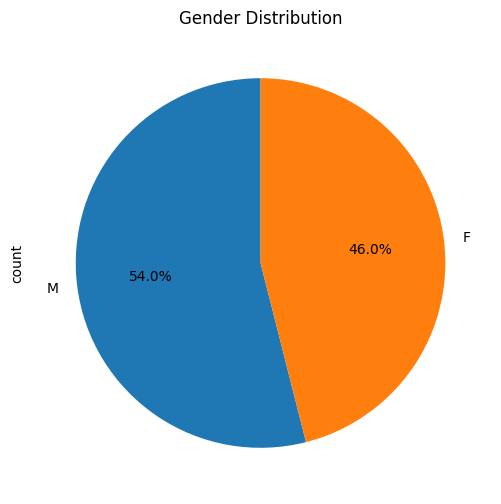

In [13]:
# Gender distribution

gender_count = df['gender'].value_counts()
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), title='Gender Distribution')
plt.show()

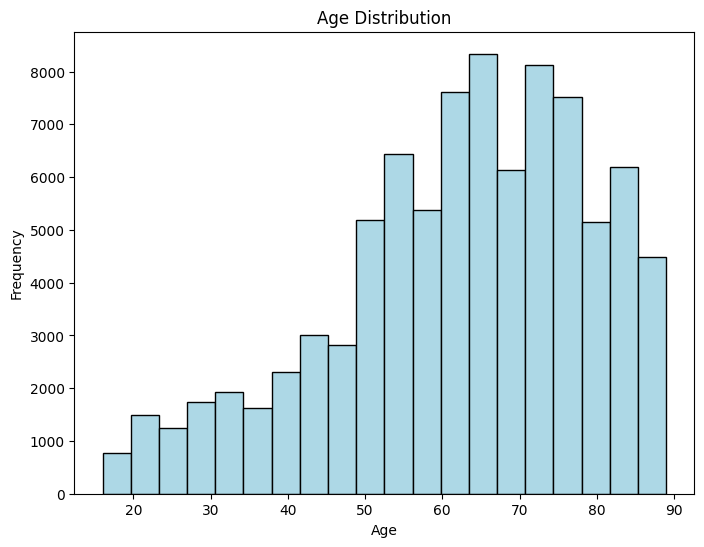

In [14]:
# Age Distribution

df['age'].dropna().plot(kind='hist', bins=20, color='lightblue', edgecolor='black', figsize=(8, 6), title='Age Distribution')
plt.xlabel('Age')
plt.show()

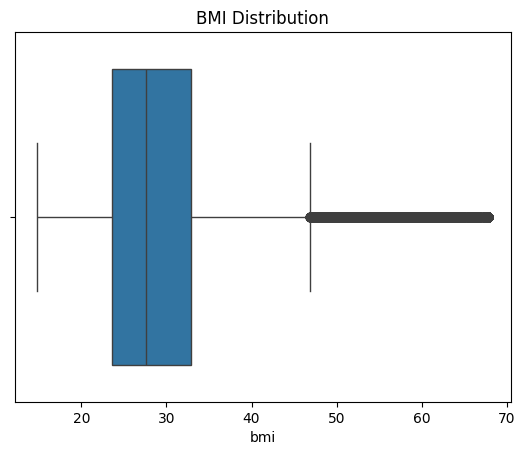

In [15]:
# BMI Distribution

sns.boxplot(x=df['bmi'])
plt.title('BMI Distribution')
plt.show()

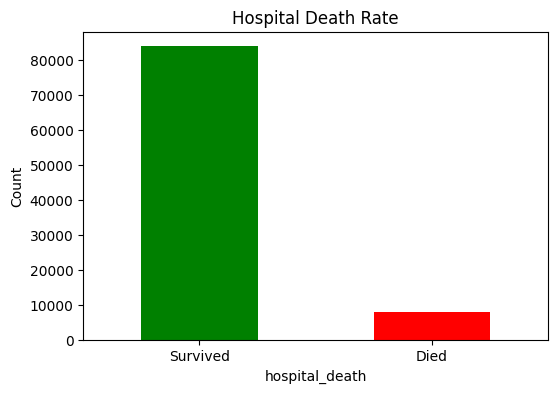

In [16]:
# Hospital Death Rate

death_rate = df['hospital_death'].value_counts()
death_rate.plot(kind='bar', color=['green', 'red'], figsize=(6, 4), title='Hospital Death Rate')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Died'], rotation=0)
plt.ylabel('Count')
plt.show()

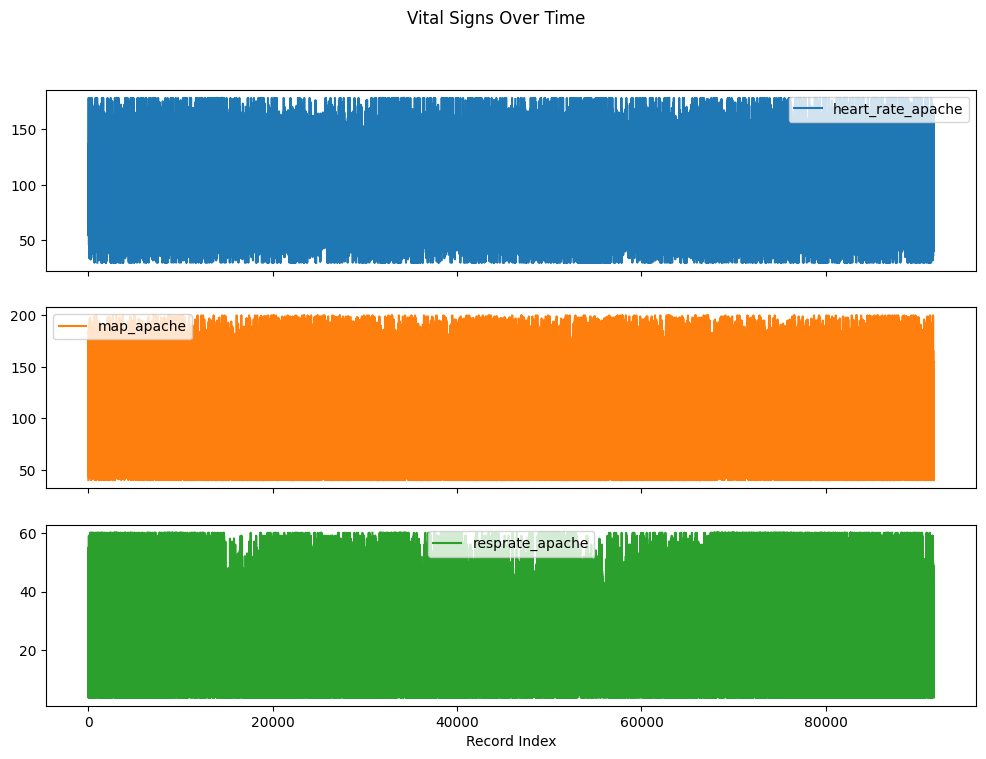

In [17]:
# Vital Signs Analysis

vital_signs = ['heart_rate_apache', 'map_apache', 'resprate_apache']
df[vital_signs].plot(subplots=True, figsize=(12, 8), title='Vital Signs Over Time')
plt.xlabel('Record Index')
plt.show()

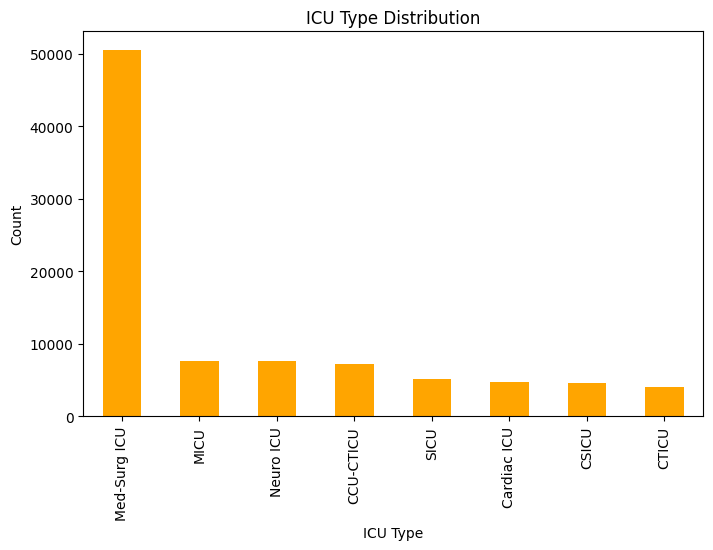

In [18]:
# ICU Type Distribution

icu_type_count = df['icu_type'].value_counts()
icu_type_count.plot(kind='bar', color='orange', figsize=(8, 5), title='ICU Type Distribution')
plt.xlabel('ICU Type')
plt.ylabel('Count')
plt.show()

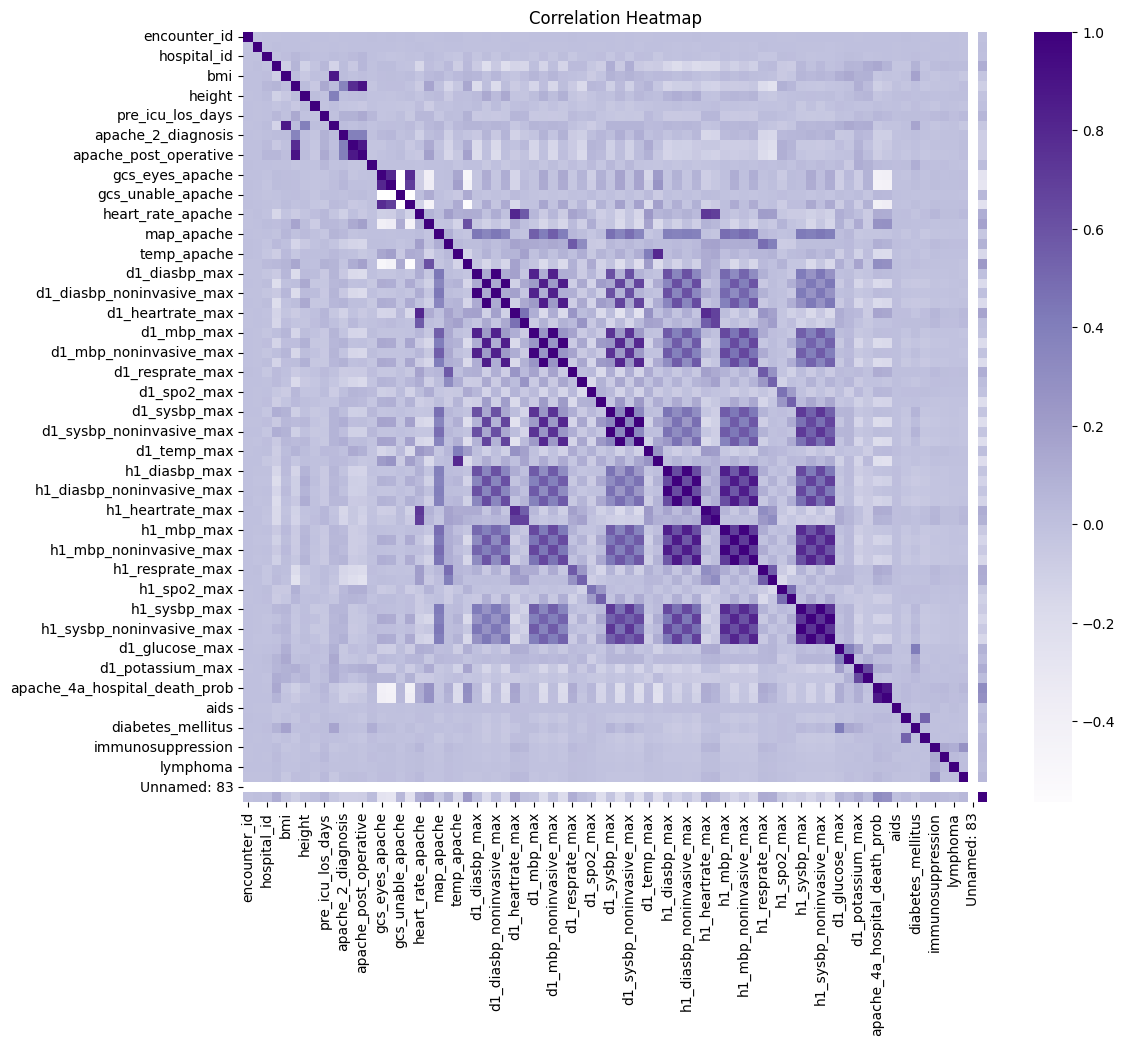

In [20]:
# Correlaton Heatmap

correlation = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='Purples', annot=False)
plt.title('Correlation Heatmap')
plt.show()

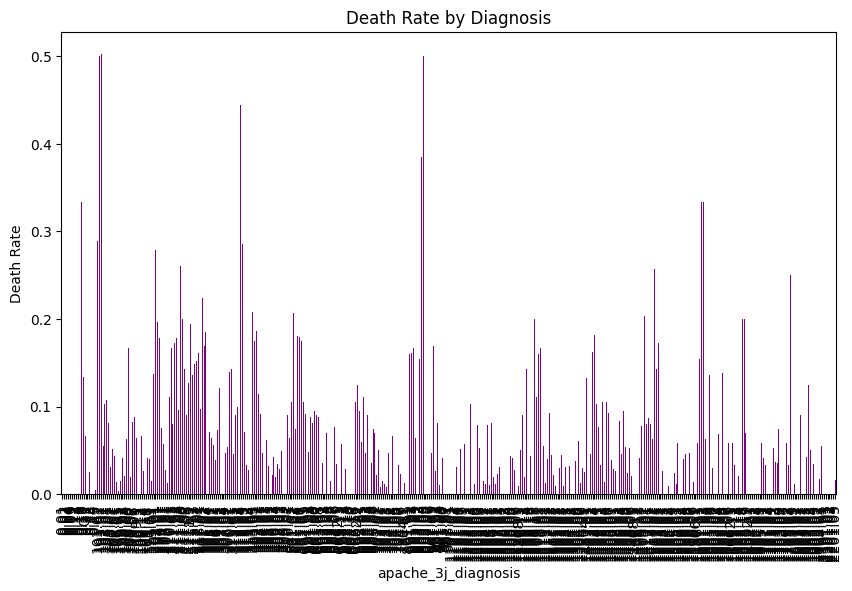

In [21]:
# Death Rate Diagnosis

diagnosis_outcome = df.groupby('apache_3j_diagnosis')['hospital_death'].mean()
diagnosis_outcome.plot(kind='bar', figsize=(10, 6), title='Death Rate by Diagnosis', color='purple')
plt.ylabel('Death Rate')
plt.show()

## Data Preprocesssing

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression

In [35]:
# DDroppingg unwanted columns

df.drop(["Unnamed: 83","encounter_id","patient_id","hospital_id"], axis=1,inplace=True)

In [36]:
# Dropping Null values from dataframe

df = df.dropna()

In [37]:
target = 'hospital_death'
numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_features.remove(target)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [38]:
# Creating a pipepline for data preprocessing

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [40]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [41]:
# Train test and split

X = df.drop(["hospital_death"],axis=1)
y = df['hospital_death']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Building & Prediction

In [42]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'elective_surgery', 'height',
                                                   'icu_id', 'pre_icu_los_days',
                                                   'weight',
                                                   'apache_2_diagnosis',
                                                   'apache_3j_diagnosis',
                                                   'apache_post_operative',
                                                   'arf_apache',
                                                   'gcs_eyes_apache',
                                                   'gcs_motor_a...
                                                   'd1_mbp_max', 'd1_mbp_min',
                                                   'd1_mbp_noninvasive_max', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ethnicity', 'gender',
                                                   'icu_admit_source',
                                                   'icu_stay_type', 'icu_type',
                                                   'apache_3j_bodysystem',
                                                   'apache_2_bodysystem'])])),
                ('model', LogisticRegression())])

In [43]:
accuracy = model_pipeline.score(X_val, y_val)

In [44]:
y_pred = model_pipeline.predict(X_val)

In [45]:
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9229310102571309
